In [1]:
import pandas as pd
from tabulate import tabulate

from SimCAD.engine import ExecutionMode, ExecutionContext, Executor
from simulations.demo import simple_tracker
from SimCAD import configs

exec_mode = ExecutionMode()

single_config = [configs[0]]
single_proc_ctx = ExecutionContext(exec_mode.single_proc)
run1 = Executor(single_proc_ctx, single_config)
run1_raw_result = run1.main()[0]
result = pd.DataFrame(run1_raw_result)
result.head()

single_proc: [<SimCAD.configuration.Configuration object at 0x110fb1198>]


,elapsed_time,mech_step,mirror,run,signal,time_step,timestamp
0,0.0,0,0.000000,1,0.000000,0,2018-01-01 00:00:00
1,1.0,1,0.000000,1,0.000000,1,2018-01-01 00:00:01
2,2.0,1,0.000000,1,0.125333,2,2018-01-01 00:00:02
3,3.0,1,0.125333,1,0.248690,3,2018-01-01 00:00:03
4,4.0,1,0.248690,1,0.368125,4,2018-01-01 00:00:04


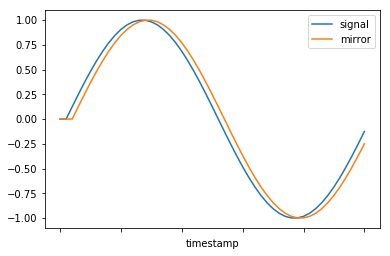

In [3]:
result.plot('timestamp', ['signal','mirror'])